# 🧠 딥러닝 하이퍼파라미터 튜닝 실습

**목적:** '혼자 공부하는 머신러닝, 딥러닝' 방식을 딥러닝에 적용  
**데이터:** Mall Customer Segmentation 데이터  
**모델:** 분류 신경망 (Classification Neural Network)

In [3]:
import sys
!{sys.executable} -m pip install keras tensorflow

In [2]:
print(sys.executable)
!which python
!which pip

/Users/greenpianorabbit/Documents/Development/customer-segmentation/venv/bin/python
/Users/greenpianorabbit/Documents/Development/customer-segmentation/venv/bin/python
/Users/greenpianorabbit/Documents/Development/customer-segmentation/venv/bin/pip


In [4]:
# 필요한 라이브러리 import
# import sys
import os
from tensorflow import keras

# 프로젝트 루트 디렉토리를 Python path에 추가
project_root = os.path.dirname(os.getcwd())
if project_root not in sys.path:
    sys.path.append(project_root)

from core.hyperparameter_tuning import HyperparameterTuner, run_grid_search_experiment
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# TensorFlow 경고 줄이기
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

print("🎯 하이퍼파라미터 튜닝 환경 준비 완료!")
print("📊 사용할 데이터: Mall Customer Segmentation")
print("🧠 테스트할 모델: 분류 신경망")

2025-07-18 22:07:51.126 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


🎯 하이퍼파라미터 튜닝 환경 준비 완료!
📊 사용할 데이터: Mall Customer Segmentation
🧠 테스트할 모델: 분류 신경망


## 📊 실험 1: 데이터 확인

In [5]:
# 튜너 인스턴스 생성
tuner = HyperparameterTuner()

# 데이터 로드 및 전처리
X_train, X_test, y_train, y_test = tuner.prepare_data()

print(f"훈련 데이터 크기: {X_train.shape}")
print(f"테스트 데이터 크기: {X_test.shape}")
print(f"클러스터 수: {len(np.unique(y_train))}")
print(f"특성 수: {X_train.shape[1]}")

2025-07-18 22:07:57.112 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-07-18 22:07:57.115 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


📊 데이터 로드 및 전처리 중...


2025-07-18 22:07:57.876 
  command:

    streamlit run /Users/greenpianorabbit/Documents/Development/customer-segmentation/venv/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-07-18 22:07:57.878 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-18 22:07:57.880 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-18 22:07:57.925 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-18 22:07:57.926 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


데이터 크기: (200, 5)
훈련 세트: (160, 3), 테스트 세트: (40, 3)
클러스터 분포: [44 41 47 37 31]
훈련 데이터 크기: (160, 3)
테스트 데이터 크기: (40, 3)
클러스터 수: 5
특성 수: 3


In [6]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([ 9,  8, 10,  7,  6]))

## 🔧 실험 2: Learning Rate 튜닝

**가설:** 학습률이 너무 높으면 발산하고, 너무 낮으면 학습이 느려질 것이다.

\n=== 1단계: Learning Rate 튜닝 ===
학습률은 모델 성능에 가장 큰 영향을 미치는 하이퍼파라미터야!
\n🔧 학습률 0.1 테스트 중...


/Users/greenpianorabbit/Documents/Development/customer-segmentation/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ 학습률 0.1: 최고 검증 정확도 = 0.9750
   → 학습률이 너무 높을 수 있음 (발산 위험)
\n🔧 학습률 0.01 테스트 중...
✅ 학습률 0.01: 최고 검증 정확도 = 1.0000
   → 적절한 학습률 범위
\n🔧 학습률 0.001 테스트 중...
✅ 학습률 0.001: 최고 검증 정확도 = 0.9750
   → 적절한 학습률 범위
\n🔧 학습률 0.0001 테스트 중...
✅ 학습률 0.0001: 최고 검증 정확도 = 0.6000
   → 학습률이 너무 낮을 수 있음 (학습 속도 느림)
\n🎯 최적 학습률: 0.01 (정확도: 1.0000)


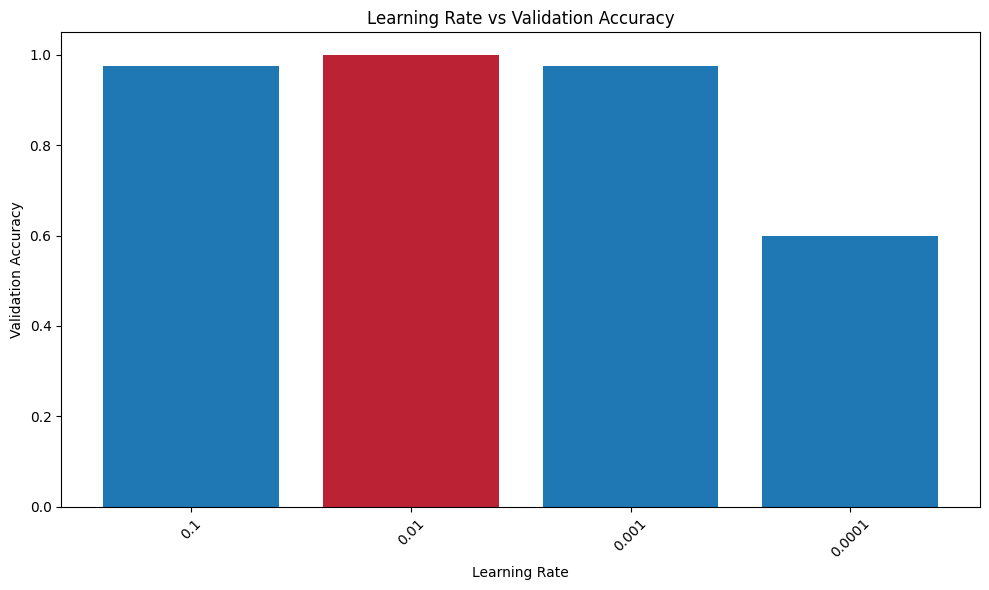

🎯 최적 학습률: 0.01


,learning_rate,val_accuracy
0,0.1000,0.975
1,0.0100,1.000
2,0.0010,0.975
3,0.0001,0.600


In [5]:
# 학습률 튜닝 실행
best_lr, lr_results = tuner.tune_learning_rate(X_train, y_train, X_test, y_test)

# 결과 시각화
if lr_results:
    lr_df = pd.DataFrame(lr_results)
    
    plt.figure(figsize=(10, 6))
    plt.bar([str(lr) for lr in lr_df['learning_rate']], lr_df['val_accuracy'])
    plt.title('Learning Rate vs Validation Accuracy')
    plt.xlabel('Learning Rate')
    plt.ylabel('Validation Accuracy')
    plt.xticks(rotation=45)
    
    # 최고 성능 강조
    best_idx = lr_df['val_accuracy'].idxmax()
    plt.bar(str(lr_df.loc[best_idx, 'learning_rate']), lr_df.loc[best_idx, 'val_accuracy'], color='red', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    
    print(f"🎯 최적 학습률: {best_lr}")
    display(lr_df[['learning_rate', 'val_accuracy']].round(4))

## 🧠 실험 3: Hidden Units 튜닝

**가설:** 뉴런이 너무 적으면 underfitting, 너무 많으면 overfitting이 발생할 것이다.

\n=== 2단계: Hidden Units 튜닝 (최적 학습률 0.01 사용) ===
은닉층 크기는 모델의 표현력을 결정해!
\n🔧 은닉층 16개 뉴런 테스트 중...


/Users/greenpianorabbit/Documents/Development/customer-segmentation/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ 은닉층 16개: 최고 검증 정확도 = 0.9750
   → 작은 모델: 빠르지만 표현력 제한적
\n🔧 은닉층 32개 뉴런 테스트 중...
✅ 은닉층 32개: 최고 검증 정확도 = 1.0000
   → 작은 모델: 빠르지만 표현력 제한적
\n🔧 은닉층 64개 뉴런 테스트 중...
✅ 은닉층 64개: 최고 검증 정확도 = 1.0000
   → 적절한 크기: 균형 잡힌 모델
\n🔧 은닉층 128개 뉴런 테스트 중...
✅ 은닉층 128개: 최고 검증 정확도 = 1.0000
   → 적절한 크기: 균형 잡힌 모델
\n🔧 은닉층 256개 뉴런 테스트 중...
✅ 은닉층 256개: 최고 검증 정확도 = 1.0000
   → 큰 모델: 표현력 높지만 과적합 위험
\n🎯 최적 은닉층 크기: 32 (정확도: 1.0000)


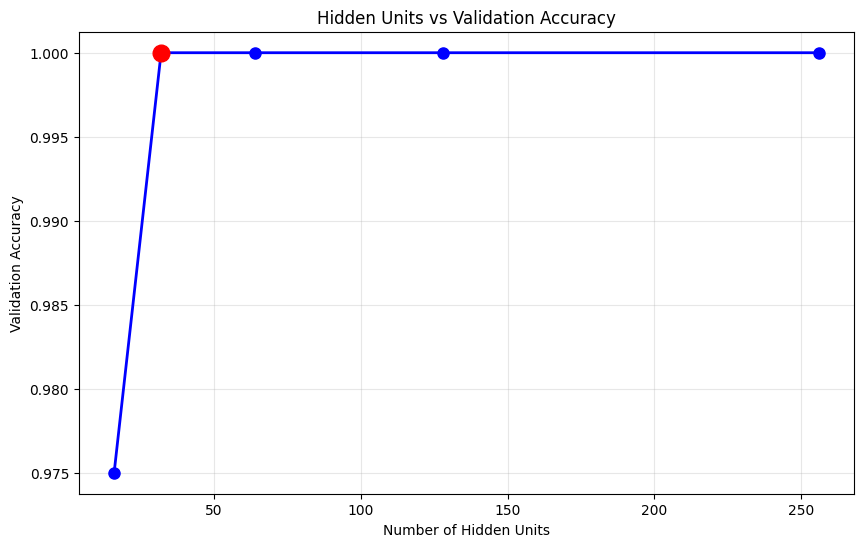

🎯 최적 은닉층 크기: 32


,hidden_units,val_accuracy
0,16,0.975
1,32,1.000
2,64,1.000
3,128,1.000
4,256,1.000


In [6]:
# 은닉층 크기 튜닝 실행 (최적 학습률 사용)
best_units, units_results = tuner.tune_hidden_units(X_train, y_train, X_test, y_test, best_lr)

# 결과 시각화
if units_results:
    units_df = pd.DataFrame(units_results)
    
    plt.figure(figsize=(10, 6))
    plt.plot(units_df['hidden_units'], units_df['val_accuracy'], 'bo-', linewidth=2, markersize=8)
    plt.title('Hidden Units vs Validation Accuracy')
    plt.xlabel('Number of Hidden Units')
    plt.ylabel('Validation Accuracy')
    plt.grid(True, alpha=0.3)
    
    # 최고 성능 포인트 강조
    best_idx = units_df['val_accuracy'].idxmax()
    plt.plot(units_df.loc[best_idx, 'hidden_units'], units_df.loc[best_idx, 'val_accuracy'], 'ro', markersize=12)
    
    plt.show()
    
    print(f"🎯 최적 은닉층 크기: {best_units}")
    display(units_df[['hidden_units', 'val_accuracy']].round(4))

## 🎯 실험 4: Dropout Rate 튜닝

**가설:** 적절한 드롭아웃은 과적합을 방지하면서 성능을 유지할 것이다.

\n=== 3단계: Dropout Rate 튜닝 (학습률 0.01, 은닉층 32 사용) ===
드롭아웃은 과적합을 방지하는 핵심 기법이야!
\n🔧 드롭아웃 0.0 테스트 중...


/Users/greenpianorabbit/Documents/Development/customer-segmentation/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ 드롭아웃 0.0: 검증 정확도 = 1.0000
   훈련 정확도 = 0.9937, 과적합 갭 = -0.0063
   → 드롭아웃 없음: 과적합 위험 있음
\n🔧 드롭아웃 0.1 테스트 중...
✅ 드롭아웃 0.1: 검증 정확도 = 1.0000
   훈련 정확도 = 1.0000, 과적합 갭 = 0.0000
   → 적절한 드롭아웃: 균형 잡힌 정규화
\n🔧 드롭아웃 0.2 테스트 중...
✅ 드롭아웃 0.2: 검증 정확도 = 1.0000
   훈련 정확도 = 0.9937, 과적합 갭 = -0.0063
   → 적절한 드롭아웃: 균형 잡힌 정규화
\n🔧 드롭아웃 0.3 테스트 중...
✅ 드롭아웃 0.3: 검증 정확도 = 1.0000
   훈련 정확도 = 0.9688, 과적합 갭 = -0.0312
   → 적절한 드롭아웃: 균형 잡힌 정규화
\n🔧 드롭아웃 0.4 테스트 중...
✅ 드롭아웃 0.4: 검증 정확도 = 1.0000
   훈련 정확도 = 0.9625, 과적합 갭 = -0.0375
   → 높은 드롭아웃: 과적합 방지 강화, 표현력 감소
\n🔧 드롭아웃 0.5 테스트 중...
✅ 드롭아웃 0.5: 검증 정확도 = 0.9750
   훈련 정확도 = 0.9375, 과적합 갭 = -0.0375
   → 높은 드롭아웃: 과적합 방지 강화, 표현력 감소
\n🎯 최적 드롭아웃: 0.0 (정확도: 1.0000)


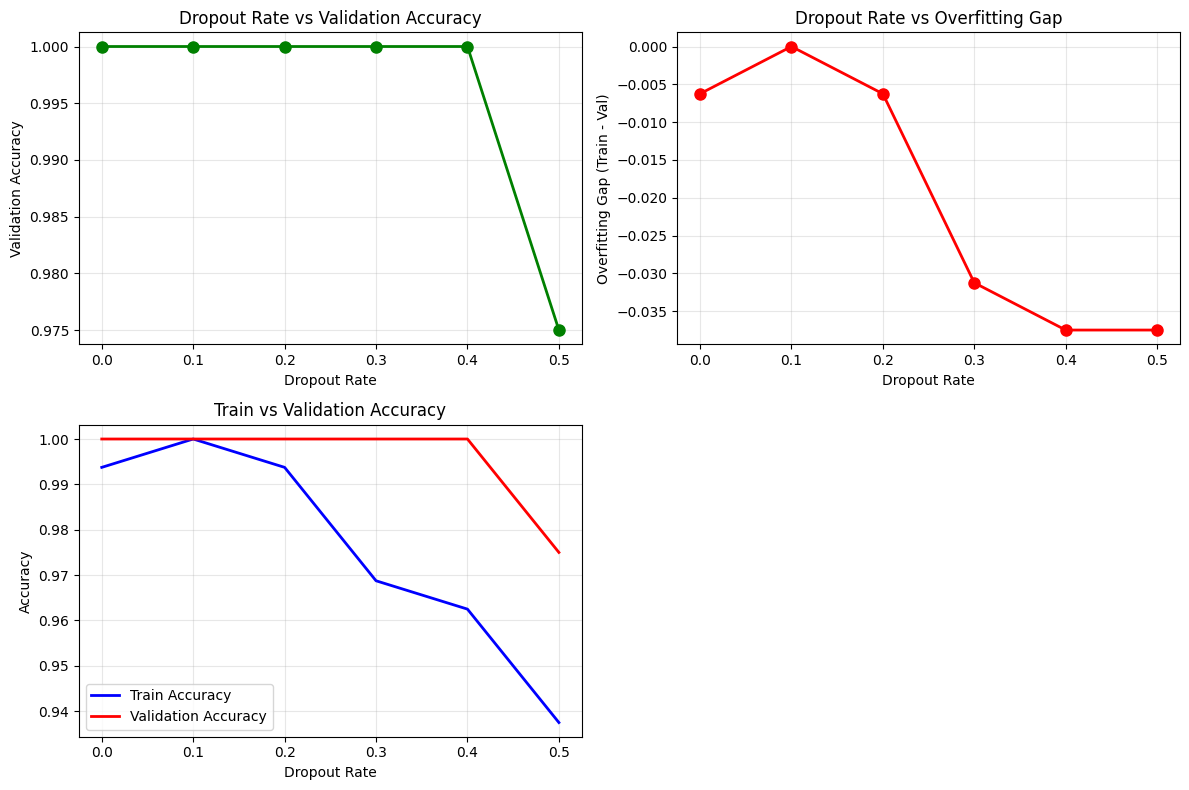

🎯 최적 드롭아웃 비율: 0.0


,dropout_rate,val_accuracy,train_accuracy,overfitting_gap
0,0.0,1.000,0.9937,-0.0063
1,0.1,1.000,1.0000,0.0000
2,0.2,1.000,0.9937,-0.0063
3,0.3,1.000,0.9688,-0.0312
4,0.4,1.000,0.9625,-0.0375
5,0.5,0.975,0.9375,-0.0375


In [7]:
# 드롭아웃 비율 튜닝 실행
best_dropout, dropout_results = tuner.tune_dropout_rate(X_train, y_train, X_test, y_test, best_lr, best_units)

# 결과 시각화
if dropout_results:
    dropout_df = pd.DataFrame(dropout_results)
    
    plt.figure(figsize=(12, 8))
    
    # 검증 정확도 그래프
    plt.subplot(2, 2, 1)
    plt.plot(dropout_df['dropout_rate'], dropout_df['val_accuracy'], 'go-', linewidth=2, markersize=8)
    plt.title('Dropout Rate vs Validation Accuracy')
    plt.xlabel('Dropout Rate')
    plt.ylabel('Validation Accuracy')
    plt.grid(True, alpha=0.3)
    
    # 과적합 갭 그래프
    plt.subplot(2, 2, 2)
    plt.plot(dropout_df['dropout_rate'], dropout_df['overfitting_gap'], 'ro-', linewidth=2, markersize=8)
    plt.title('Dropout Rate vs Overfitting Gap')
    plt.xlabel('Dropout Rate')
    plt.ylabel('Overfitting Gap (Train - Val)')
    plt.grid(True, alpha=0.3)
    
    # 훈련 vs 검증 정확도 비교
    plt.subplot(2, 2, 3)
    plt.plot(dropout_df['dropout_rate'], dropout_df['train_accuracy'], 'b-', label='Train Accuracy', linewidth=2)
    plt.plot(dropout_df['dropout_rate'], dropout_df['val_accuracy'], 'r-', label='Validation Accuracy', linewidth=2)
    plt.title('Train vs Validation Accuracy')
    plt.xlabel('Dropout Rate')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"🎯 최적 드롭아웃 비율: {best_dropout}")
    display(dropout_df[['dropout_rate', 'val_accuracy', 'train_accuracy', 'overfitting_gap']].round(4))

## 🏆 실험 5: 최종 모델 훈련

\n=== 🏆 최종 검증 ===
최적 하이퍼파라미터:
- Learning Rate: 0.01
- Hidden Units: 32
- Dropout Rate: 0.0
\n🚀 최종 모델 훈련 시작 (충분한 에포크로)...


/Users/greenpianorabbit/Documents/Development/customer-segmentation/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


\n🏆 최종 테스트 정확도: 1.0000
🏆 최종 테스트 손실: 0.0563
🏆 최고 훈련 정확도: 0.9937
🏆 최고 검증 정확도: 1.0000
🏆 과적합 갭: -0.0063


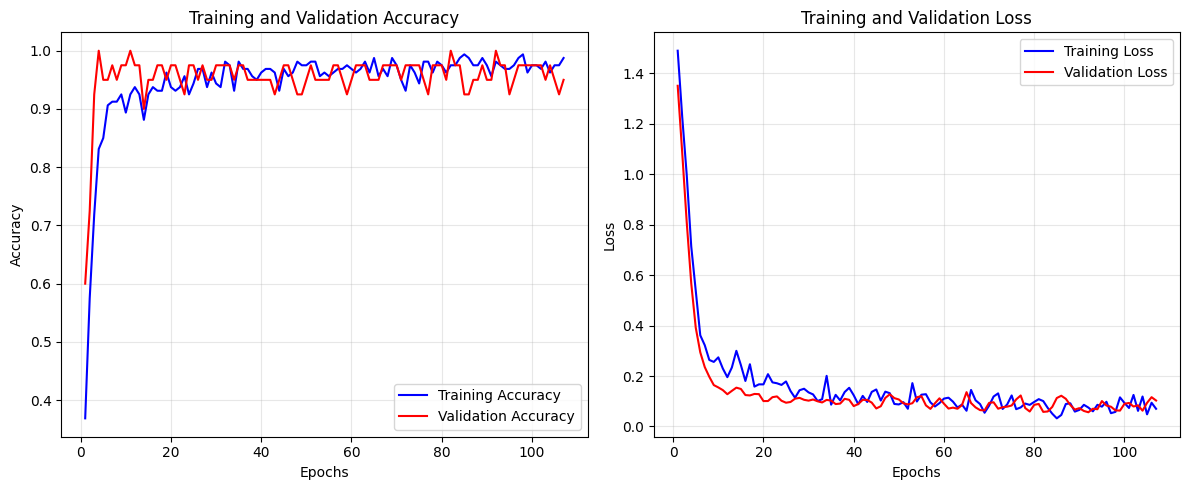


🏆 최종 결과 요약:
- 최적 Learning Rate: 0.01
- 최적 Hidden Units: 32
- 최적 Dropout Rate: 0.0
- 최종 테스트 정확도: 1.0000
- 최종 테스트 손실: 0.0563


In [8]:
# 최적 하이퍼파라미터로 최종 모델 훈련
final_model, final_history = tuner.final_validation(
    X_train, y_train, X_test, y_test, 
    best_lr, best_units, best_dropout
)

if final_model and final_history:
    # 훈련 과정 시각화
    plt.figure(figsize=(12, 5))
    
    # 정확도 그래프
    plt.subplot(1, 2, 1)
    epochs = range(1, len(final_history.history['accuracy']) + 1)
    plt.plot(epochs, final_history.history['accuracy'], 'b-', label='Training Accuracy')
    plt.plot(epochs, final_history.history['val_accuracy'], 'r-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 손실 그래프
    plt.subplot(1, 2, 2)
    plt.plot(epochs, final_history.history['loss'], 'b-', label='Training Loss')
    plt.plot(epochs, final_history.history['val_loss'], 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 최종 성능 평가
    test_loss, test_accuracy = final_model.evaluate(X_test, y_test, verbose=0)
    
    print("\n🏆 최종 결과 요약:")
    print(f"- 최적 Learning Rate: {best_lr}")
    print(f"- 최적 Hidden Units: {best_units}")
    print(f"- 최적 Dropout Rate: {best_dropout}")
    print(f"- 최종 테스트 정확도: {test_accuracy:.4f}")
    print(f"- 최종 테스트 손실: {test_loss:.4f}")

## 📝 학습 정리

### 배운 것들:
1. **Learning Rate의 중요성**: 가장 큰 영향을 미치는 하이퍼파라미터
2. **Network Size**: 적절한 크기가 중요 (너무 크면 overfitting, 너무 작으면 underfitting)
3. **Dropout의 효과**: 과적합 방지에 효과적
4. **단계별 접근법**: 체계적인 튜닝이 무작위 탐색보다 효율적

### 실무 적용:
- Early Stopping으로 시간 절약
- 검증 세트 기준으로 선택
- 과적합 갭 모니터링
- 재현 가능한 실험 설계